In [4]:
import configparser
import pymysql
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
import importlib
import src.utils
importlib.reload(src.utils)
from src.utils import get_dataframe_from_pymysql_cursor, generate_comparitive_violin_plot

In [10]:
config = configparser.ConfigParser()
filename = './resource/db.ini'
config.read(filename)

['./resource/db.ini']

In [11]:
connection = pymysql.connect(host=config['DATABASE']['HOST'],
                             user=config['DATABASE']['USERNAME'],
                             password=config['DATABASE']['PASSWORD'],
                             db="patent_20200929",
                             charset='utf8mb4',
                             defer_connect=True)

# Size of each cluster (Before/After)

In [12]:
old_disambig_data_query = """
select count(1) as cluster_size, inventor_id
from rawinventor
group by inventor_id
"""

old_disambig_data=get_dataframe_from_pymysql_cursor(connection, old_disambig_data_query)

In [13]:
new_disambig_data_query = """
SELECT disambiguated_id, count(1) as cluster_size
from tmp_inventor_disambiguation_granted
group by disambiguated_id;
"""

new_disambig_data=get_dataframe_from_pymysql_cursor(connection, new_disambig_data_query)

In [18]:
old_stats=pd.DataFrame(old_disambig_data.describe())

new_stats= pd.DataFrame(new_disambig_data.describe())

old_stats.join(new_stats,lsuffix="_old", rsuffix="_new")

,cluster_size_old,cluster_size_new
count,3.976284e+06,3.455954e+06
mean,4.523643e+00,5.206058e+00
std,1.329402e+01,1.422315e+01
min,1.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00
50%,1.000000e+00,2.000000e+00
75%,4.000000e+00,4.000000e+00
max,5.767000e+03,5.762000e+03


In [19]:
fig,plots = generate_comparitive_violin_plot(old_disambig_data.cluster_size, new_disambig_data.cluster_size, log=True)

In [36]:
plots[0].set_ylabel("Log of Cluster Sizes")
plots[0].set_title("Cluster Size (Old Disambiguation)")
plots[0].set_xticks([])
plots[1].set_ylabel("Log of Cluster Sizes")
plots[1].set_title("Cluster Size (New Disambiguation)")
plots[0].set_xticks([])

[]

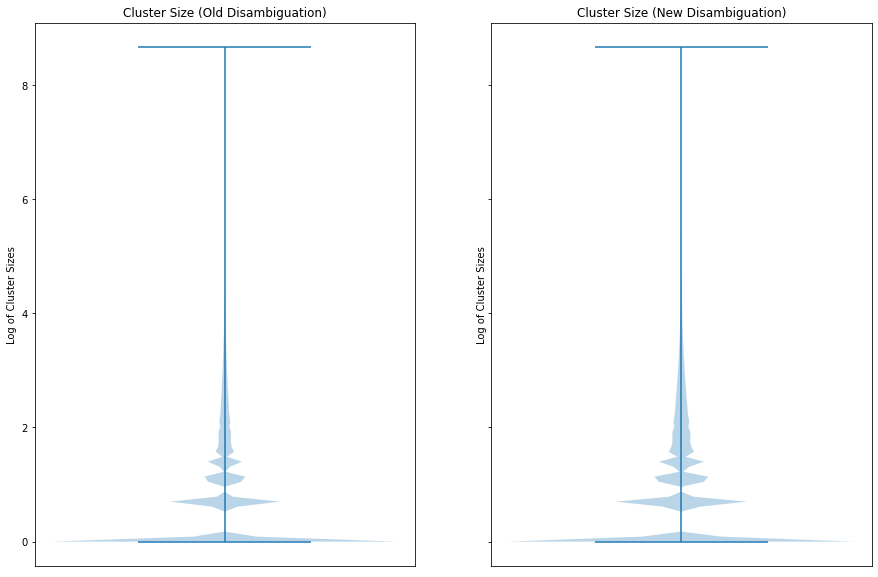

In [37]:
fig